## Entendendo como gerar spike trains a partir de uma imagem usando a lib snntorch

### Usando a Imagem inicial

In [2]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML
from PIL import Image
from torchvision import transforms
from snntorch import spikegen
import cv2
import numpy as np


### Aplicando transformações na imagem para melhorar o contraste

In [3]:
fileName = 'mono_modo.png'
img_ori = cv2.imread(fileName)

In [4]:
# Convertendo para escala cinza:
img_gs = cv2.cvtColor(img_ori,cv2.COLOR_BGR2GRAY)

# Aplicando filtro Gaussiano:
img_blur = cv2.GaussianBlur(img_gs, (0,0), sigmaX=6, sigmaY=6)

# Corrindo falhas com Fechamento Morfológico
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
img_morph = cv2.morphologyEx(img_blur, cv2.MORPH_CLOSE, kernel)

# Aplicando filtro de binarizacao de Otsu
#img_otsu = cv2.threshold(img_morph, 0, 255, cv2.THRESH_OTSU)[1]

# Aplicando filtro binario adaptativo gaussiano
img_ag = cv2.adaptiveThreshold(img_gs,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

In [39]:
#cv2.imshow('Original', img_ori)
#cv2.imshow('Original-Cinza', img_gs)
#cv2.imshow('Original-Cinza-Blur', img_blur)
#cv2.imshow('Original-Cinza-Blur-Morph', img_morph)
#cv2.imshow('Original-Cinza-Blur-Morph-Ostu', img_otsu)
cv2.imshow('Original-Cinza-Blur-Morph-AG', img_ag)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [41]:
#cv2.imwrite('mono_modo_gs.png', img_gs)
#cv2.imwrite('mono_modo_blur.png', img_blur)
#cv2.imwrite('mono_modo_morph.png', img_morph)
cv2.imwrite('mono_modo_ag.png', img_ag)

True

In [5]:
fileName = 'mono_modo_ag.png'
img = Image.open(fileName)

preprocess = transforms.Compose([
             transforms.Resize((438, 330)),
             transforms.ToTensor(),
             transforms.Normalize((0,),(1,))])
Timg = preprocess(img)

In [6]:
num_steps = 100
rateSpikedImg = spikegen.rate(Timg, num_steps=num_steps)
rateConvSpikedImg = spikegen.rate_conv(Timg)
latSpikedImg = spikegen.latency(Timg, num_steps=num_steps, tau=10, normalize=True)
deltaSpikedImg = spikegen.delta(Timg, threshold=4)

RuntimeError: Requested MovieWriter (ffmpeg) not available

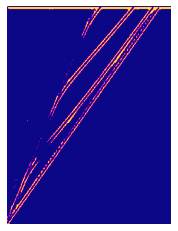

In [7]:
fig, ax = plt.subplots()
anim = splt.animator(latSpikedImg[:,0], fig, ax)
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\dmene\\OneDrive\\Documents\\ffmpeg.exe'
HTML(anim.to_html5_video())

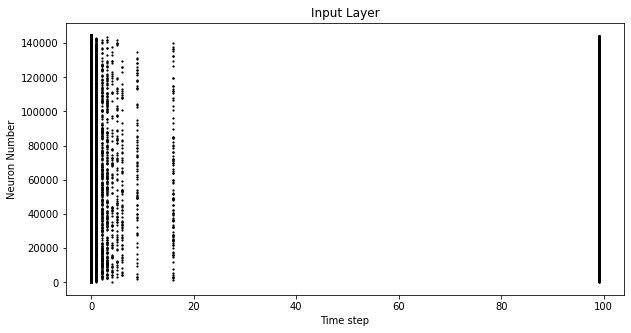

In [61]:
# Reshape
spike_data_sample2 = latSpikedImg[:, 0].reshape((num_steps, -1))

# raster plot
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data_sample2, ax, s=1.5, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()